In [45]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
import warnings
import os
warnings.filterwarnings("ignore")

## Loading Data

In [46]:
data = pd.read_csv('Student Mental health.csv')
data.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [47]:
#drop NA value
data= data[data['Age'].notna()]
data.shape

(100, 11)

In [48]:
data.head(1)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No


In [49]:
#Rename columns
data.columns = ['Timestamp', 'Gender', 'Age', 'Course', 'Year', 'CGPA', 'Marital_Status', 'Depression', 'Anxiety', 'Panic_Attack', 'Treatment']
data.head(1)

,Timestamp,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No


In [50]:
#Formatting the Year column
data['Year'].unique()
# array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2', 'Year 3'], dtype=object)

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

##### Few findings
- The maximum duration of any particular course is 4 years as per the data. The minimum duration cannot be determined.
- Year 1  and year 1 mean the same thing (and same with other values) yet are interpreted as different.

In [51]:
def Clean(Text):
    Text = Text[-1]
    Text = int(Text)
    return Text
data["Year"] = data["Year"].apply(Clean)

In [52]:
data['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

##### Few findings
- The CGPA column has ranges rather than an absolute value.
- The range '3.50 - 4.00' is same as '3.50 - 4.00 ', so we need to trim the trailing whitespace.

In [53]:
def remove_space(string):
    string = string.strip()
    return string
data["CGPA"] = data["CGPA"].apply(remove_space)
print("First three values of CGPA after cleaning text:")
print(data["CGPA"][:3], "\n")
print(data['CGPA'].unique())

First three values of CGPA after cleaning text:
0    3.00 - 3.49
1    3.00 - 3.49
2    3.00 - 3.49
Name: CGPA, dtype: object 

['3.00 - 3.49' '3.50 - 4.00' '2.50 - 2.99' '2.00 - 2.49' '0 - 1.99']


In [54]:
len(data['Course'].unique())

49

In [55]:
#replace redundant course name with the standard course name
data['Course'].replace({'engin': 'Engineering' , 'Engine':'Engineering' , 'Islamic education':'Islamic Education' , 'Pendidikan islam':'Pendidikan Islam' , 'BIT':'IT', 'psychology':'Psychology', 'koe': 'Koe', 'Kirkhs': 'Irkhs', 'KIRKHS': 'Irkhs', 'Benl': 'BENL', 'Fiqh fatwa ': 'Fiqh', 'Laws': 'Law'} , inplace = True)
len(data['Course'].unique())

37

## Data Visualisation and Insights 

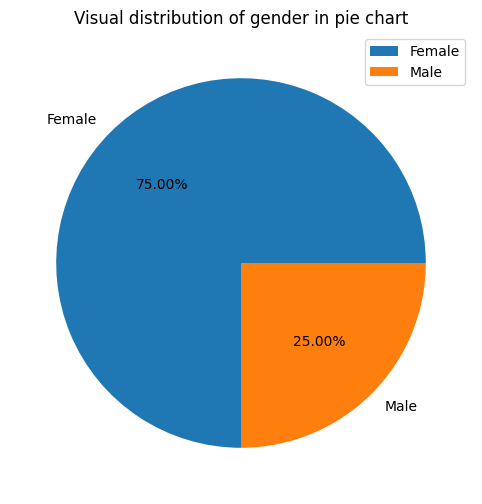

Number of male and female: 
 Gender
Female    75
Male      25
Name: Gender, dtype: int64


In [56]:
plt.figure(figsize=(12,6))
plt.title("Visual distribution of gender in pie chart")
g = plt.pie(data['Gender'].value_counts(),autopct='%1.2f%%', labels=data['Gender'].value_counts().index);
plt.legend()
plt.show()
print('Number of male and female: \n',data.groupby('Gender')['Gender'].agg('count').sort_values(ascending=False))

Text(0.5, 1.0, 'Distribuition of panic attack among students agewise')

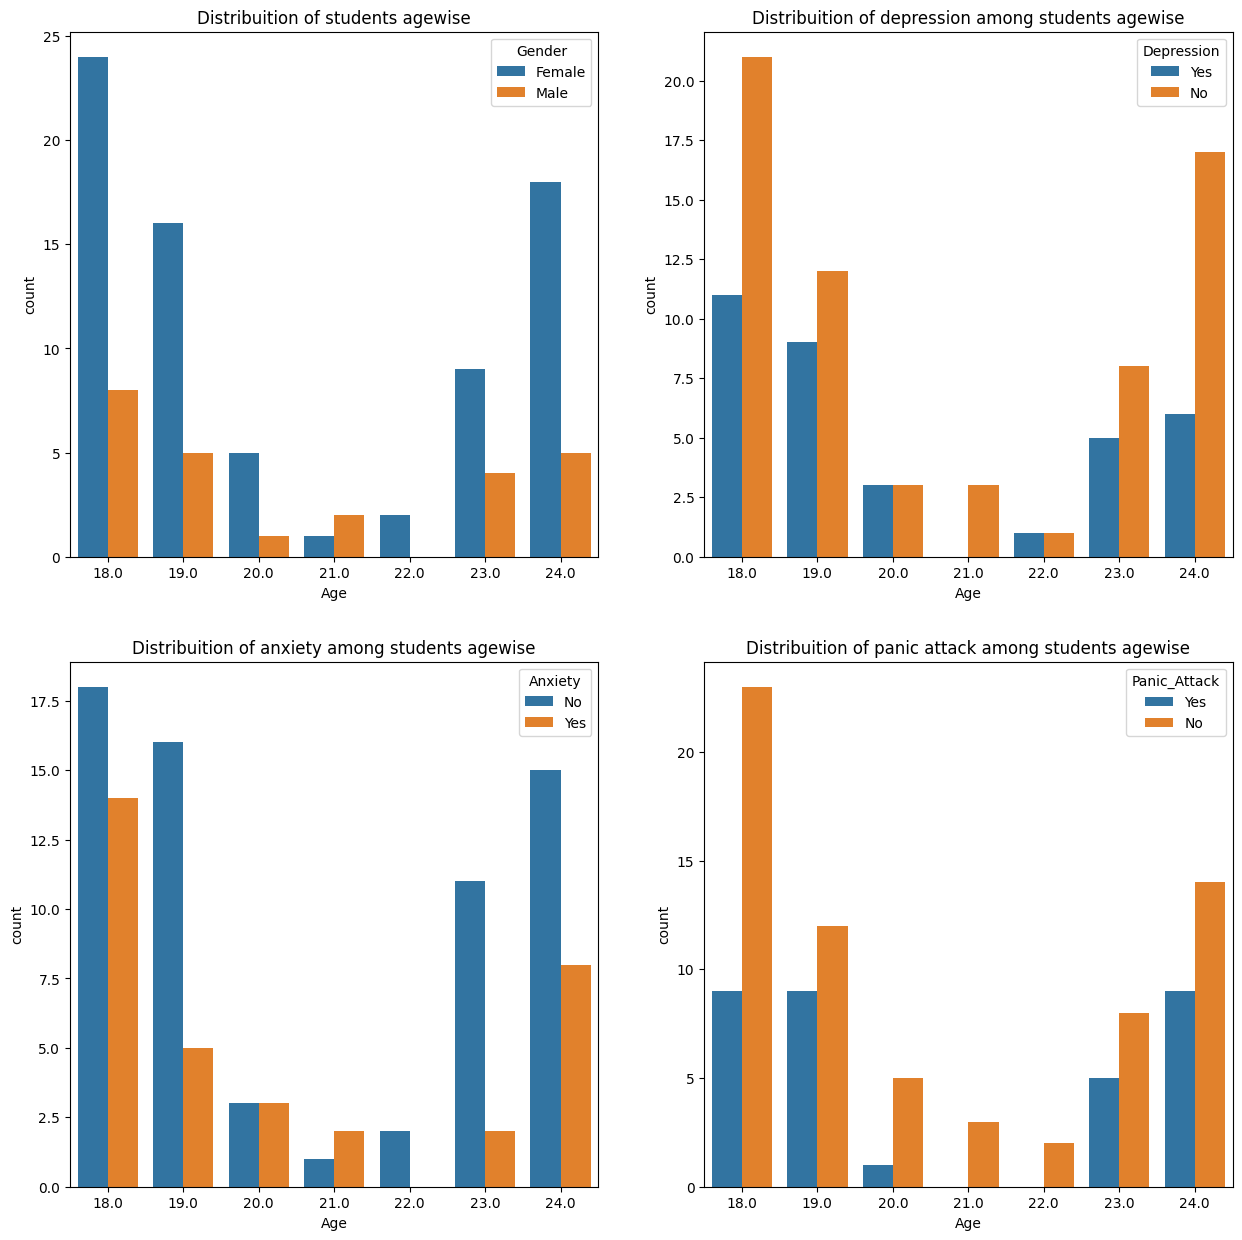

In [57]:
fig, axes = plt.subplots(2, 2, figsize=(15,15))
sns.countplot(data = data,x='Age',hue='Gender', ax=axes[0][0])
axes[0][0].set_title('Distribuition of students agewise')
sns.countplot(data=data,x='Age',hue='Depression', ax=axes[0][1])
axes[0][1].set_title('Distribuition of depression among students agewise')
sns.countplot(data=data,x='Age',hue='Anxiety', ax=axes[1][0])
axes[1][0].set_title('Distribuition of anxiety among students agewise')
sns.countplot(data=data,x='Age',hue='Panic_Attack', ax=axes[1][1])
axes[1][1].set_title('Distribuition of panic attack among students agewise')

Text(0.5, 1.0, 'Distribuition of panic attack among students genderwise')

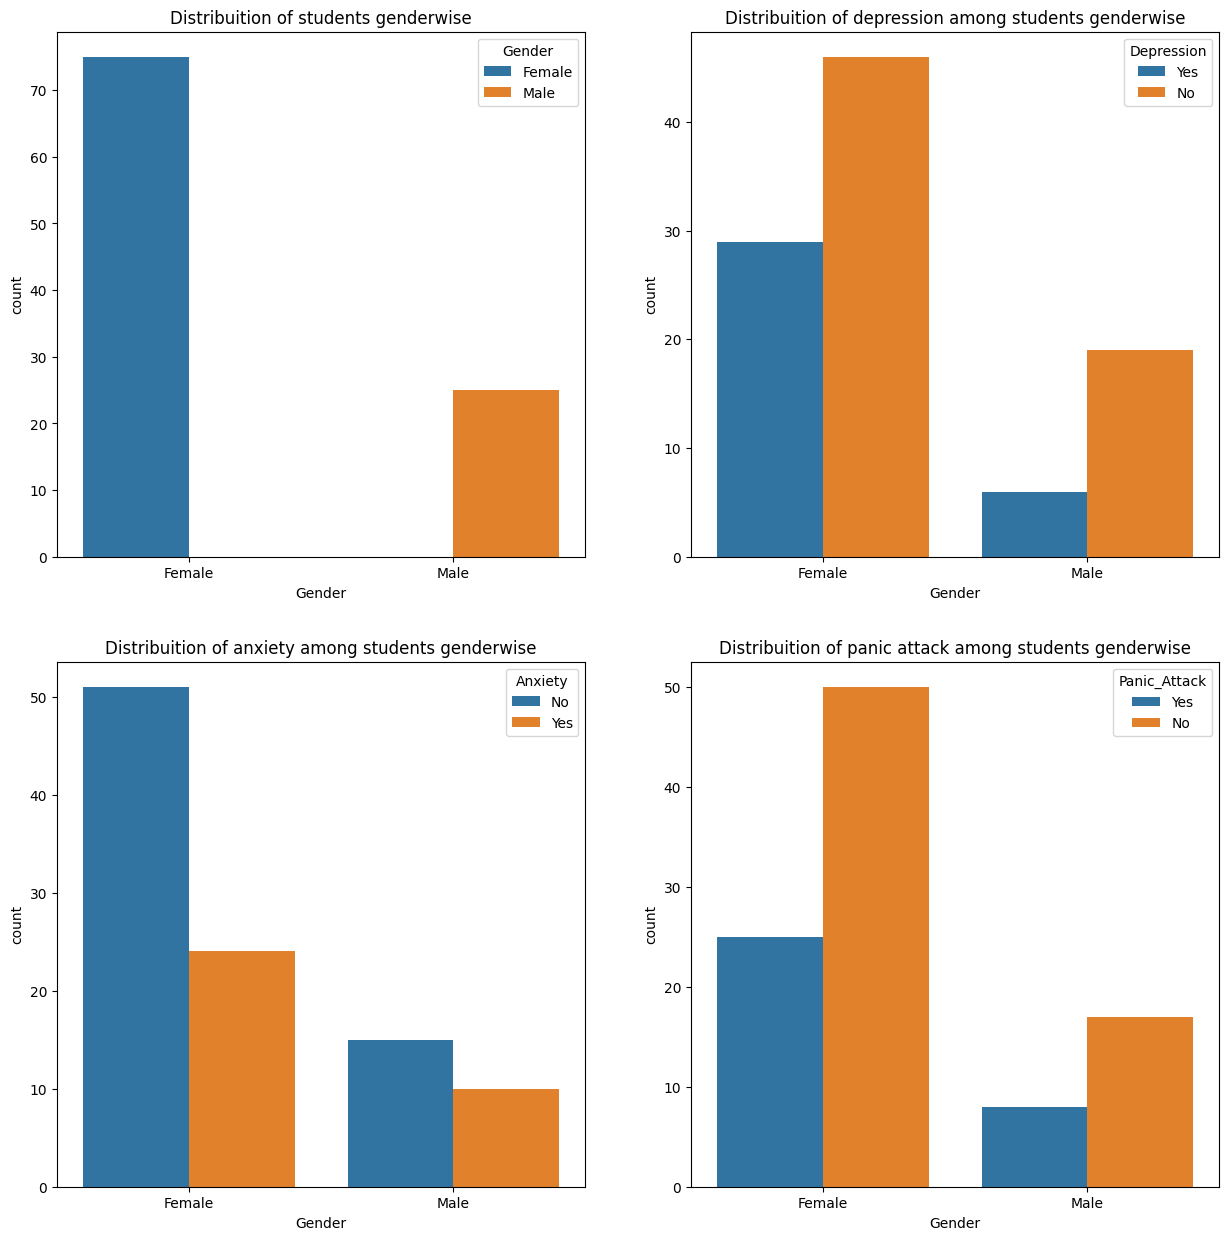

In [58]:
fig, axes = plt.subplots(2, 2, figsize=(15,15))
sns.countplot(data = data,x='Gender',hue='Gender', ax=axes[0][0])
axes[0][0].set_title('Distribuition of students genderwise')
sns.countplot(data=data,x='Gender',hue='Depression', ax=axes[0][1])
axes[0][1].set_title('Distribuition of depression among students genderwise')
sns.countplot(data=data,x='Gender',hue='Anxiety', ax=axes[1][0])
axes[1][0].set_title('Distribuition of anxiety among students genderwise')
sns.countplot(data=data,x='Gender',hue='Panic_Attack', ax=axes[1][1])
axes[1][1].set_title('Distribuition of panic attack among students genderwise')

From these graphs we can observe that - 
- more than half the students having CGPA of 3.00-3.49 have depression.
- maximum students facing anxiety have a CGPA of 3.50-4.00, followed by 3.00-3.49, and 2.50-2.99
- more than half of the students having CGPA of 3.50-4.00 have panic attacks.

We can conclude that, students with higher CGPA experience depression,anxiety, and panic attacks more compared to those with lesser CGPA.

In [59]:
data.drop('Timestamp', axis=1, inplace=True)

In [60]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
categorical_columns= [x for x in data.columns if data.dtypes[x] == 'object']
for column in categorical_columns:
    data[column] = encoder.fit_transform(data[column])
data.head()

,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,0,18.0,14,1,3,0,1,0,1,0
1,1,21.0,20,2,3,0,0,1,0,0
2,1,19.0,18,1,3,0,1,1,1,0
3,0,22.0,25,3,3,1,1,0,0,0
4,1,23.0,29,4,3,0,0,0,0,0


<AxesSubplot:>

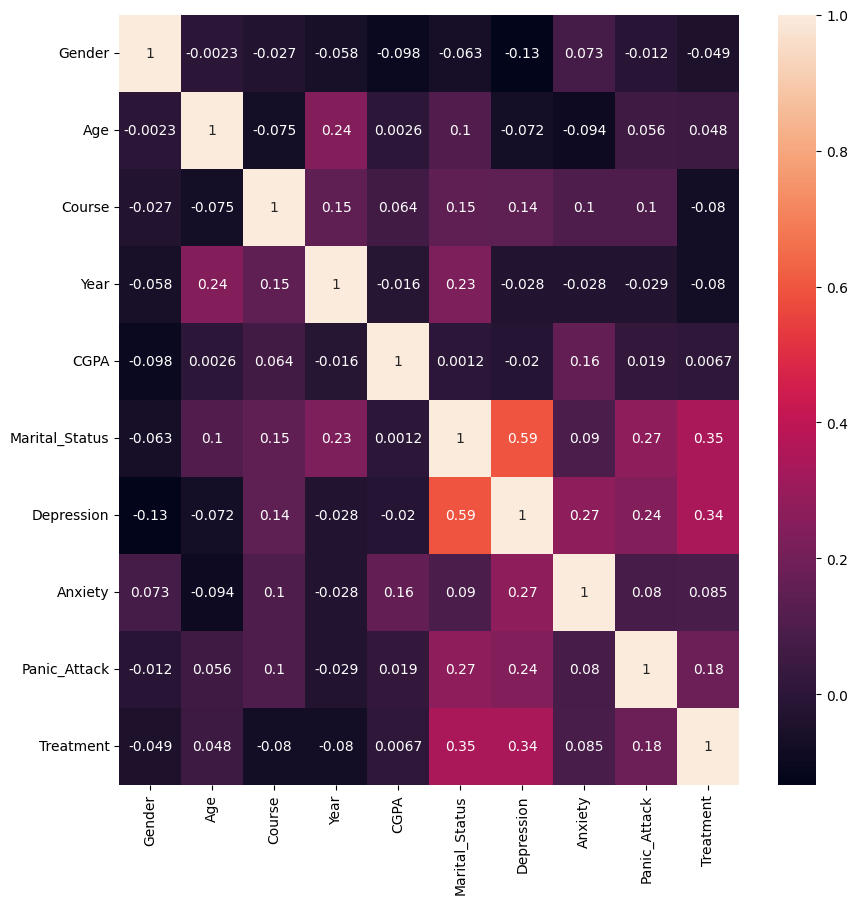

In [61]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(10,10))  
sns.heatmap(corrmat,annot=True, cmap=None)

#### Few Findings:
- Marital_Status shows a close association with Depression.
- Depression. Anxiety, Panick_Attack show a significant correlation.
- Medical assistance(Treatment) shows a slight correlation with Marital_Status 

## Model Selection


In [62]:
X = data.drop(["CGPA"],axis=1)
y = data["CGPA"]

In [63]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [64]:
#A quick model selection process
#pipelines of models( it is short was to fit and pred)
pipeline_lr=Pipeline([('lr_classifier',LogisticRegression(random_state=42))])

pipeline_dt=Pipeline([ ('dt_classifier',DecisionTreeClassifier(random_state=42))])

pipeline_rf=Pipeline([('rf_classifier',RandomForestClassifier())])

pipeline_svc=Pipeline([('sv_classifier',SVC())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svc]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: "SVC"}


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

#cross validation on accuracy 
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train, cv=10 )
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

Logistic Regression: 0.557143 
Decision Tree: 0.471429 
RandomForest: 0.614286 
SVC: 0.500000 


## Model Evaluation

In [65]:
#taking look at the test set
pred_rfc = pipeline_rf.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)

0.4666666666666667


In [66]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)
#Testing the Model on test set
predictions=RF_model.predict(X_test)
acccuracy= accuracy_score(y_test,predictions)
acccuracy

0.43333333333333335

In [67]:
acccuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average="weighted")
precision = precision_score(y_test, predictions, average="weighted")
f1_score = f1_score(y_test, predictions, average="micro")

print("********* Random Forest Results *********")
print("Accuracy    : ", acccuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("F1 Score    : ", f1_score)

********* Random Forest Results *********
Accuracy    :  0.43333333333333335
Recall      :  0.43333333333333335
Precision   :  0.3722222222222223
F1 Score    :  0.43333333333333335


In [68]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.44      0.67      0.53        12
           4       0.42      0.36      0.38        14

    accuracy                           0.43        30
   macro avg       0.17      0.20      0.18        30
weighted avg       0.37      0.43      0.39        30



<AxesSubplot:>

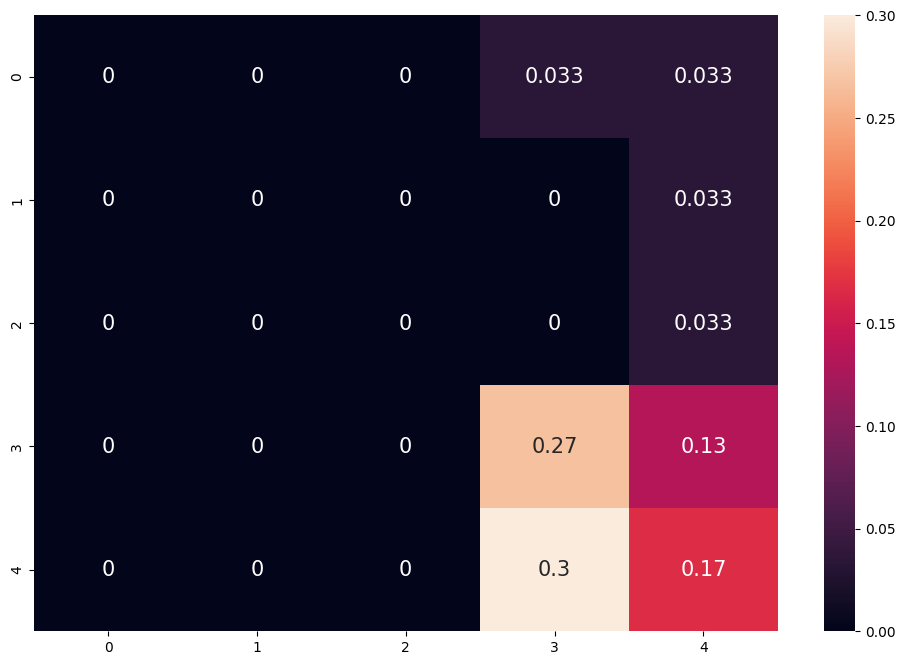

In [69]:
# confusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=None,annot = True, annot_kws = {'size':15})